In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
flag_black_inner = True

In [19]:
if flag_black_inner: blacout_type = "inner"
else: blacout_type = "outer"

In [20]:
def plot_blackout_circle(size, R, flag_black_inner):
    """
    Plot a circular mask blackout to the center of a square image with radius R.
    :param R: Radius of the blackout circle (better if it is an odd number)
    :param flag_black_inner: If True we are removing the Inner center of the image, else the outer.
    """
    
    # Center of the image
    center_x, center_y = size // 2, size // 2
    
    # Create a mask with the same dimensions as the image
    y, x = np.ogrid[:size, :size]
    
    # Correct the radius to be applied in a circular pattern
    mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= (R ** 2)
    
    # If we are not blacking out the inner, then we are the outer:
    if not flag_black_inner:
        mask = np.logical_not(mask)
        
    # Plotting the mask
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap='gray_r')
    plt.axis('off')  # Hide axes for better visualization

    # Show the image
    plt.show()
 
    return


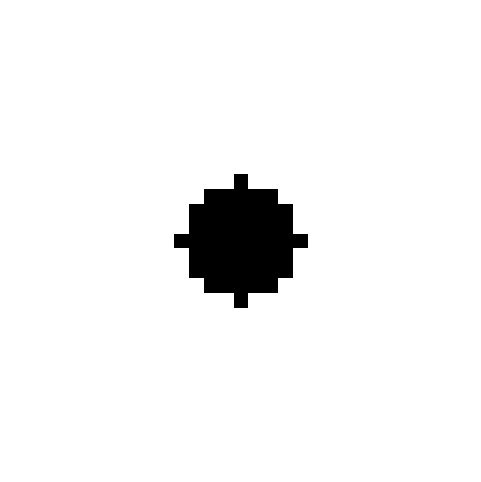

In [21]:
images_blacked_out = plot_blackout_circle(size = 31, R = 4, flag_black_inner=flag_black_inner)

In [22]:

def plot_blackout_circle(size, R, flag_black_inner):
    """
    Plot a circular mask blackout to the center of a square image with radius R.
    The black part will be transparent in the PNG.
    """
    
    # Center of the image
    center_x, center_y = size // 2, size // 2
    
    # Create a mask
    y, x = np.ogrid[:size, :size]
    mask = (x - center_x) ** 2 + (y - center_y) ** 2 <= (R ** 2)
    
    # If we are not blacking out the inner, invert the mask
    if not flag_black_inner:
        mask = np.logical_not(mask)
    
    # Create an RGBA image: white where mask is True, transparent elsewhere
    rgba = np.zeros((size, size, 4), dtype=np.float32)
    rgba[mask, :3] = 1.0  # RGB = white
    rgba[mask, 3] = 1.0   # Alpha = fully opaque
    rgba[~mask, 3] = 0.0  # Alpha = fully transparent

    # Plot without axes
    plt.figure(figsize=(6, 6))
    plt.imshow(rgba)
    plt.axis('off')

    # Save as PNG with transparency
    blackout_type = "inner" if flag_black_inner else "outer"
    plt.savefig(f'plots_storage/masks/blacking_out_R_{R}_{blackout_type}.png',
                transparent=True, bbox_inches='tight', pad_inches=0)
    plt.close()


In [23]:
images_blacked_out = plot_blackout_circle(size = 31, R = 2, flag_black_inner=flag_black_inner)

In [24]:
images_blacked_out = plot_blackout_circle(size = 31, R = 4, flag_black_inner=flag_black_inner)

In [25]:
images_blacked_out = plot_blackout_circle(size = 31, R = 6, flag_black_inner=flag_black_inner)

In [26]:
images_blacked_out = plot_blackout_circle(size = 31, R = 8, flag_black_inner=flag_black_inner)

In [27]:
images_blacked_out = plot_blackout_circle(size = 31, R = 10, flag_black_inner=flag_black_inner)

In [28]:
images_blacked_out = plot_blackout_circle(size = 31, R = 12, flag_black_inner=flag_black_inner)

In [29]:
images_blacked_out = plot_blackout_circle(size = 31, R = 14, flag_black_inner=flag_black_inner)

In [30]:
images_blacked_out = plot_blackout_circle(size = 100, R = 20, flag_black_inner=flag_black_inner)

In [31]:
# Function to blackout a circle from the center:
def get_number_trues(size, top_R):
    
    # Center of the images
    center_x, center_y = size // 2, size // 2  # For 111x111, this will be 55, 55
    
    # Create a mask with the same dimensions as the image
    y, x = np.ogrid[:size, :size]
    
    return  np.ravel([ np.sum(  (x - center_x) ** 2 + (y - center_y) ** 2 <= (R ** 2)  ) for R in range(top_R) ])
    

In [32]:
get_number_trues(111, 40)

array([   1,    5,   13,   29,   49,   81,  113,  149,  197,  253,  317,
        377,  441,  529,  613,  709,  797,  901, 1009, 1129, 1257, 1373,
       1517, 1653, 1793, 1961, 2121, 2289, 2453, 2629, 2821, 3001, 3209,
       3409, 3625, 3853, 4053, 4293, 4513, 4777])